### 6주차 : 의사결정나무 모델

In [52]:
##패키지 로드
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [53]:
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"}) ##타겟값을 숫자로 바꾸기
X = iris_frame.iloc[:,:-1]
Y = iris_frame.iloc[:,[-1]]
iris_frame

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

In [54]:
from sklearn.tree import DecisionTreeClassifier

##아래 하이퍼파라미터 수정으로 결과 확인
clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=5) ##의사결정나무 모델 불러오기
import matplotlib.colors as colors

df1 = iris_frame[["sepal length (cm)" , "sepal width (cm)", "target" ]]
X = df1.iloc[:,0:2]
Y = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

clf.fit(X,Y)
N=100

C:\Users\User\anaconda3\envs\machinelearning\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


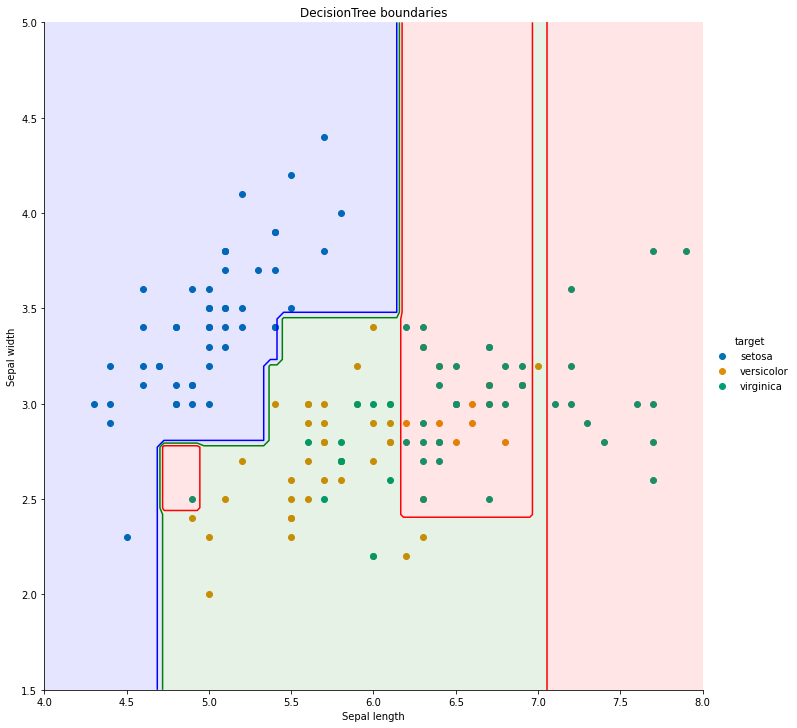

In [55]:
##분류 결과 그래프로 그리기
X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

color_list= ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1,vmax=1)
g= sn.FacetGrid(iris_frame, hue = "target", size =10, 
                palette = 'colorblind').map(plt.scatter, "sepal length (cm)","sepal width (cm)",).add_legend()

my_ax = g.ax
zz = np.array( [clf.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))]) ##Predict하기
Z=zz.reshape(X_.shape)

my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('DecisionTree boundaries')

plt.show() ## 살짝 오버피팅 문제가 있음

### 7주차 : 앙상블 모델

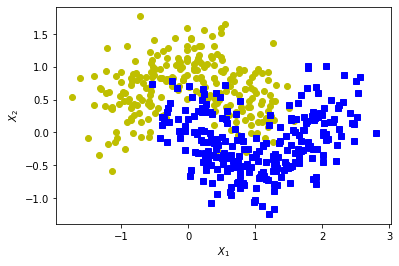

In [56]:
##패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

##데이터 만들기
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) ## Train, Val셋 나누기

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42) ##모델 불러오기
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test) ## 예측

In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [60]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [61]:
from matplotlib.colors import ListedColormap

## Decision Boundary그래프 그리기
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

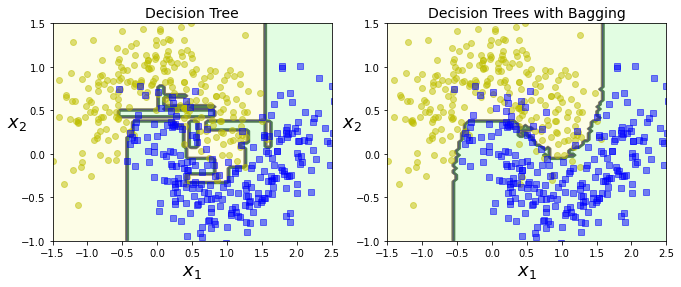

In [62]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show() ##단독으로 의사결정트리 모델을 쓰는 것보다 배깅을 활용한 것이 더 오버피팅이 되지 않았음.

In [63]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [64]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [65]:
print(accuracy_score(y_test, y_pred))

0.92


In [66]:
print(accuracy_score(y_test, y_pred_rf))

0.912


In [67]:
np.sum(y_pred == y_pred_rf) / len(y_pred)

0.976

In [68]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [69]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [70]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

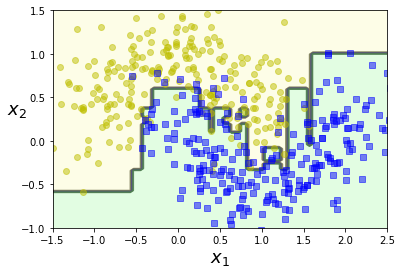

In [71]:
plot_decision_boundary(ada_clf, X, y)

### 7주차 : KNN

In [72]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [73]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [74]:
y.shape

(70000,)

In [75]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [76]:
X_train.shape

(60000, 784)

In [77]:
X_test.shape

(10000, 784)

In [78]:
#Training set 순서 섞기 (shuffling)
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_Train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [79]:
shuffle_index

array([ 3595, 11580,  3020, ..., 16566, 55494, 56770])

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [81]:
y_knn_pred = knn_clf.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.0977